<a href="https://colab.research.google.com/github/alexandra2608/cs102/blob/homework07/R%2C_%D0%A8%D0%B0%D0%B4%D1%80%D0%B8%D0%BD%D0%B0%2C_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_6_22_23_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Дескриптивный анализ данных

>$\color{red}{\text{Прежде чем перейти в выполнению заданий,}}$ 
$\color{red}{\text{через меню Файл подключите свой гугл-колаб к своему гитхабу. }}$
$\color{red}{\text{Создайте для этой работы отдельную ветку и папку – homework06.}}$

*Построение всех графиков выполняется только при помощи средств визуализации `Python`: `matplotlib`, `seaborn`, `pandas`. По каждому заданию должен быть сделан вывод. Для всех визуализаций используйте стиль `seaborn`. Обязательно добавляйте подпись графика и осей.* 

В этой практической работе вам предстоит провести анализ данных об особенностях жанров музыки. Датасет возьмите [отсюда](https://www.kaggle.com/vicsuperman/prediction-of-music-genre). Он содержит 41700 уникальных исполниителей.

Данные содержат 18 столбцов:
- `instance_id` - id строки датасета
- `artist_name` - исполнитель
- `track_name` - название трека
- `popularity` - индекс популярности трека
- `acousticness` - акустичность
- `danceability` - танцевальность (насколько трек подходит для танцев)
- `duration_ms` - длительность трека
- `energy` - энергичность трека
- `instrumentalness` - инструментальность
- `key` - регистр (высота тона)
- `liveness` - живость
- `loudness` - громкость
- `mode` - тональность
- `speechiness` - насколько много текста
- `tempo` - музыкальный темп
- `obtained_date` - дата загрузки трека в датасет
- `valence` - настроение
- `music_genre` - жанр

## Часть 2
Выполните на языке R следующие задания:
- задание 1 – целиком
- задание 2 – целиком
- задание 3 – целиком
- задание 4 – целиком
- задание 5 – целиком
- задание 6 – не выполнять
- задание 7 – целиком
- задание 8 – целиком, но в третьем пункте постройте круговую диаграмму

### Задание 1

1. Загрузите датасет `music_genre.csv`.
2. Возьмите 20 тысяч случайных строк из датасета (**все остальные задания выполняйте для этих 20 тысяч строк!!!**)
3. Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.
4. Проверьте, есть ли а датасете строки, в которых значение в столбце `artist_name` – `empty_field`. Если есть, выведите эти строки и их количество. А затем удалите из датасета.

In [9]:
install.packages("tidyverse")
library(tidyverse)

# Загрузка датасета
music_genre <- read_csv("music_genre.csv")

# Взятие 20 тысяч случайных строк
music_genre <- music_genre %>% sample_n(20000)

# Проверка на наличие дубликатов
if (anyDuplicated(music_genre)) {
  music_genre <- unique(music_genre)
}

# Проверка на пустые значения в столбце artist_name
empty_artist_name <- music_genre %>% filter(artist_name == "empty_field")
if (nrow(empty_artist_name) > 0) {
  # Вывод количества строк с пустыми значениями
  cat("Количество строк с пустыми значениями в столбце artist_name:", nrow(empty_artist_name), "\n")
  # Вывод строк с пустыми значениями
  print(empty_artist_name)
  # Удаление строк с пустыми значениями
  music_genre <- music_genre %>% filter(artist_name != "empty_field")
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘ragg’


Warning message in install.packages("tidyverse"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”
Rows: 50005 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): artist_name, track_name, key, mode, tempo, obtained_date, music_genre
dbl (11): instance_id, popularity, acousticness, danceability, duration_ms, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Количество строк с пустыми значениями в столбце artist_name: 1021 
# A tibble: 1,021 × 18
   instance_id artist_name track_name       popularity acousticness danceability
         <dbl> <chr>       <chr>                 <dbl>        <dbl>        <dbl>
 1       50684 empty_field Hot Chocolate (…         52     0.399           0.569
 2       89276 empty_field iDONTMIND                46     0.15            0.574
 3       31895 empty_field Ending Title             15     0.692           0.2  
 4       23560 empty_field Thunder Kiss '65         58     0.000817        0.682
 5       33753 empty_field 一人                     17     0.982           0.239
 6       41965 empty_field Ron's Theme              36     0.938           0.41 
 7       57946 empty_field Lonely Boy               72     0.00417         0.356
 8       37832 empty_field Call Me Back             54     0.864           0.736
 9       80056 empty_field Keep Making Me           41     0.186           0.489
10       69834 empty_

### Задание 2

1. Выведите долю каждого жанра в датасете.
2. Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.
3. Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.
4. Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).

Rows: 50005 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): artist_name, track_name, key, mode, tempo, obtained_date, music_genre
dbl (11): instance_id, popularity, acousticness, danceability, duration_ms, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Количество строк с пустым значением в столбце artist_name: 1003 



`summarise()` has grouped output by 'music_genre'. You can override using the
`.groups` argument.


Доля каждого жанра:
# A tibble: 11 × 3
   music_genre     n      prop
   <chr>       <int>     <dbl>
 1 Alternative  1856 0.0977   
 2 Anime        1860 0.0979   
 3 Blues        1875 0.0987   
 4 Classical    1883 0.0991   
 5 Country      1966 0.103    
 6 Electronic   1894 0.0997   
 7 Hip-Hop      1947 0.102    
 8 Jazz         1937 0.102    
 9 Rap          1925 0.101    
10 Rock         1854 0.0976   
11 NA              1 0.0000526

Самый танцевальный жанр: Hip-Hop 

Преобладающая тональность для каждого жанра:
# A tibble: 11 × 2
# Groups:   music_genre [11]
   music_genre key  
   <chr>       <chr>
 1 Alternative C    
 2 Anime       G    
 3 Blues       G    
 4 Classical   G    
 5 Country     G    
 6 Electronic  C#   
 7 Hip-Hop     C#   
 8 Jazz        F    
 9 Rap         C#   
10 Rock        G    
11 NA          NA   


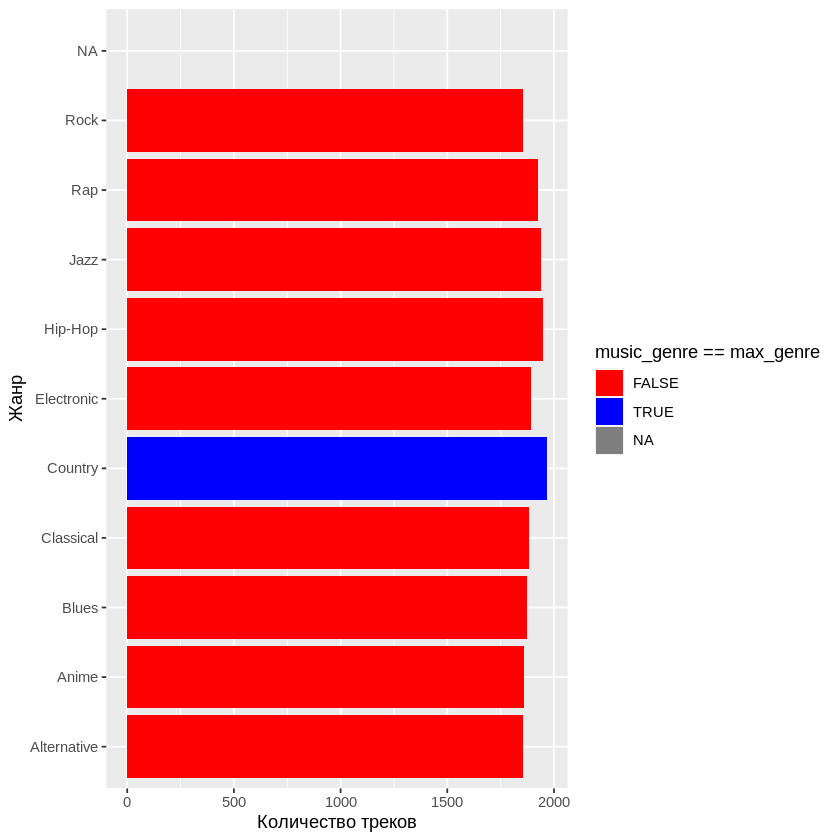

In [11]:
library(tidyverse)

# Загрузка датасета
df <- read_csv("music_genre.csv")

# Взятие 20 тысяч случайных строк
df <- df %>% sample_n(20000)

# Поиск и удаление строк с пустым значением в столбце artist_name
empty_artist <- df[df$artist_name == "empty_field", ]
cat("Количество строк с пустым значением в столбце artist_name:", nrow(empty_artist), "\n\n")
df <- df[df$artist_name != "empty_field", ]

# Доля каждого жанра
genre_prop <- df %>% count(music_genre) %>% mutate(prop = n / sum(n))

# График распределения количества треков по жанрам
max_genre <- df %>% count(music_genre) %>% arrange(desc(n)) %>% slice(1) %>% pull(music_genre)
ggplot(df, aes(x = music_genre, fill = music_genre == max_genre)) +
  geom_bar() +
  scale_fill_manual(values = c("red", "blue")) +
  labs(x = "Жанр", y = "Количество треков") + 
  coord_flip()

# Самый танцевальный жанр
dance_genre <- df %>% group_by(music_genre) %>% summarize(mean_dance = mean(danceability)) %>% 
  arrange(desc(mean_dance))
most_dance_genre <- dance_genre$music_genre[1]

# Определение преобладающей тональности для каждого жанра
mode <- df %>% group_by(music_genre, key) %>% summarize(count = n()) %>% 
  mutate(prop = count / sum(count)) %>% 
  filter(prop == max(prop)) %>% 
  select(music_genre, key)

# Вывод результатов
cat("Доля каждого жанра:\n")
print(genre_prop)
cat("\n")

cat("Самый танцевальный жанр:", most_dance_genre, "\n\n")

cat("Преобладающая тональность для каждого жанра:\n")
print(mode)


### Задание 3

1. Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.
2. Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.

Warning message in which.max(music_genre_sample$track_name):
“NAs introduced by coercion”


[1] "Самый популярный исполнитель: blackbear"


Warning message in which.min(music_genre_sample$track_name):
“NAs introduced by coercion”


[1] "Самый непопулярный исполнитель: 21 Savage"


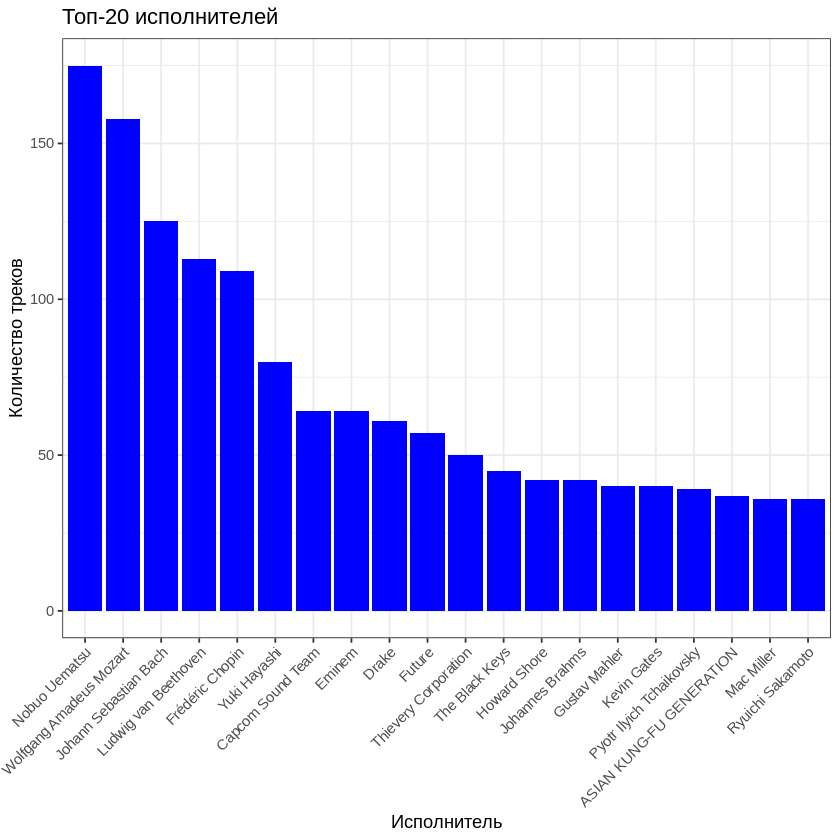

In [17]:
library(tidyverse)

empty_field_rows <- music_genre_sample %>% filter(artist_name == "empty_field")
music_genre_sample <- music_genre_sample %>% filter(artist_name != "empty_field")

most_popular_artist <- music_genre_sample[which.max(music_genre_sample$track_name), "artist_name"]
print(paste("Самый популярный исполнитель:", most_popular_artist))
least_popular_artist <- music_genre_sample[which.min(music_genre_sample$track_name), "artist_name"]
print(paste("Самый непопулярный исполнитель:", least_popular_artist))

top_20_artists <- music_genre_sample %>% count(artist_name) %>% 
  arrange(desc(n)) %>% head(20)
ggplot(data = top_20_artists, aes(x = reorder(artist_name, -n), y = n)) +
  geom_bar(stat = "identity", fill = "blue") +
  ggtitle("Топ-20 исполнителей") +
  xlab("Исполнитель") +
  ylab("Количество треков") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


### Задание 4

1. Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная корреляция? Между какими слабая? Есть ли характеристики, между которыми корреляции практически нет.
2. Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



Корреляция между популярность и длиной названия трека: -0.2287078 


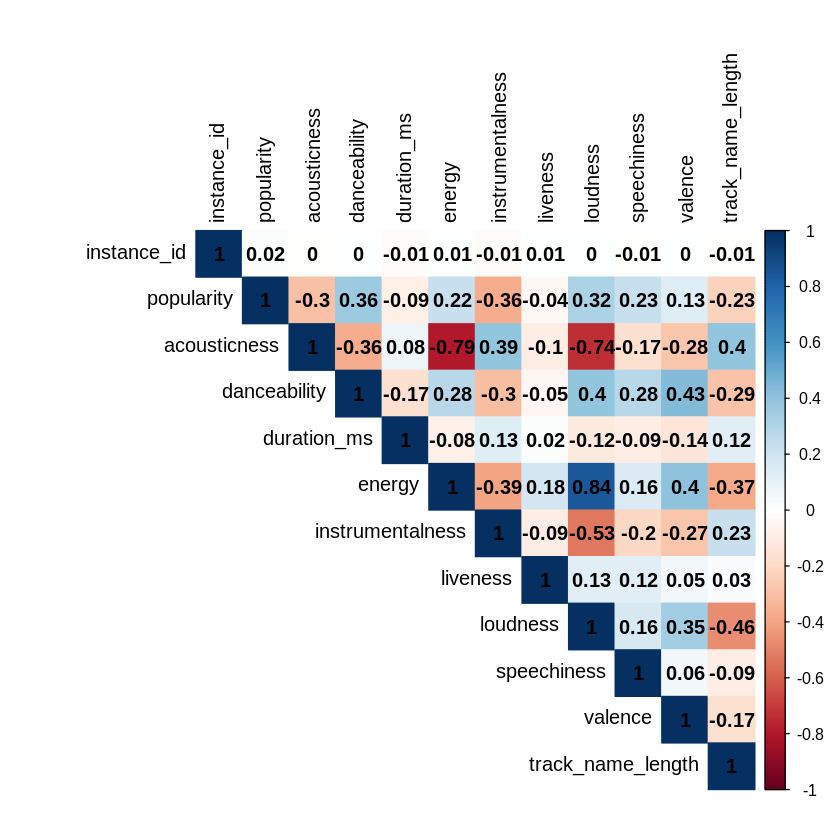

In [18]:
install.packages("corrplot")
library(corrplot)

df <- df %>% 
  mutate(track_name = as.character(track_name)) %>% 
  na.omit()

correlation_popularity_length <- function(popularity, length) {
  cor(popularity, length)
}

df$track_name_length <- nchar(as.character(df$track_name))

correlation <- correlation_popularity_length(df$popularity, df$track_name_length)

cat("Корреляция между популярность и длиной названия трека:", correlation, "\n")

df_num <- df %>% select_if(is.numeric)

corr_matrix <- cor(df_num)

corrplot(corr_matrix, method = "color", type = "upper", tl.col = "black", addCoef.col = "black")


### Задание 5

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

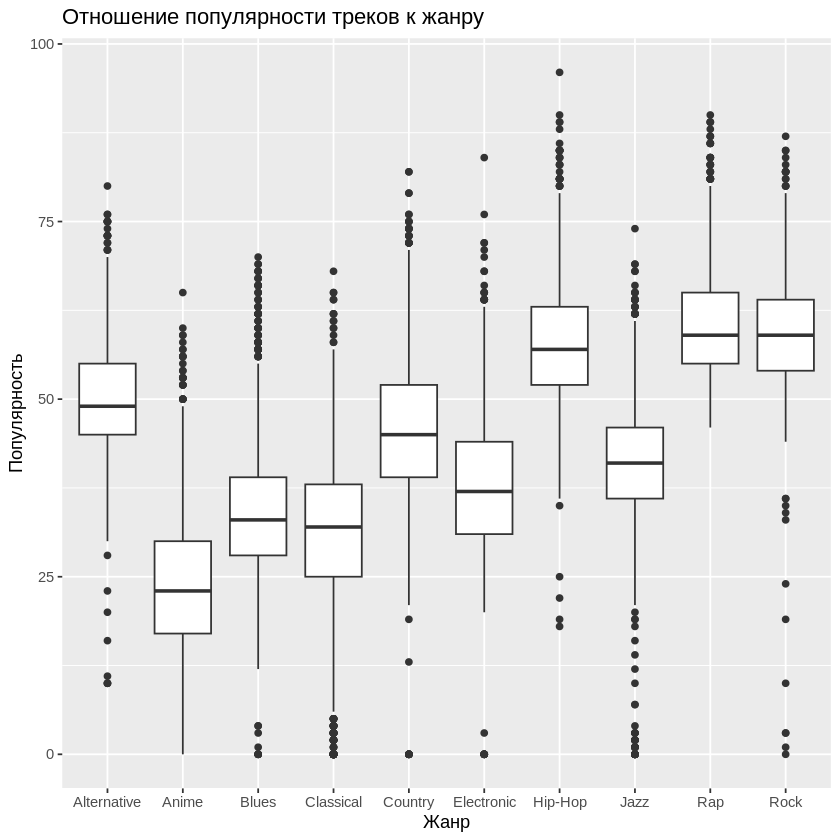

In [19]:
library(ggplot2)


# Построение ящиковой диаграммы
ggplot(music_genre, aes(x = music_genre, y = popularity)) +
  geom_boxplot() +
  labs(title = "Отношение популярности треков к жанру",
       x = "Жанр",
       y = "Популярность")


### Задание 7

На вертикальной столбиковой диаграмме для самого популярного (popularity) и самого непопулярного жанров покажите средние значения по всем характеристикам. Отрицательные и положительные значения характеристик показывайте разными цветами.

Warning message:
“There were 4 warnings in `summarise()`.
The first warning was:
ℹ In argument: `key = (structure(function (..., .x = ..1, .y = ..2, . = ..1)
  ...`.
Caused by warning in `mean.default()`:
! argument is not numeric or logical: returning NA
ℹ Run `dplyr::last_dplyr_warnings()` to see the 3 remaining warnings.”
Warning message:
“There were 4 warnings in `summarise()`.
The first warning was:
ℹ In argument: `key = (structure(function (..., .x = ..1, .y = ..2, . = ..1)
  ...`.
Caused by warning in `mean.default()`:
! argument is not numeric or logical: returning NA
ℹ Run `dplyr::last_dplyr_warnings()` to see the 3 remaining warnings.”
Warning message:
“Removed 4 rows containing missing values (`geom_col()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_col()`).”


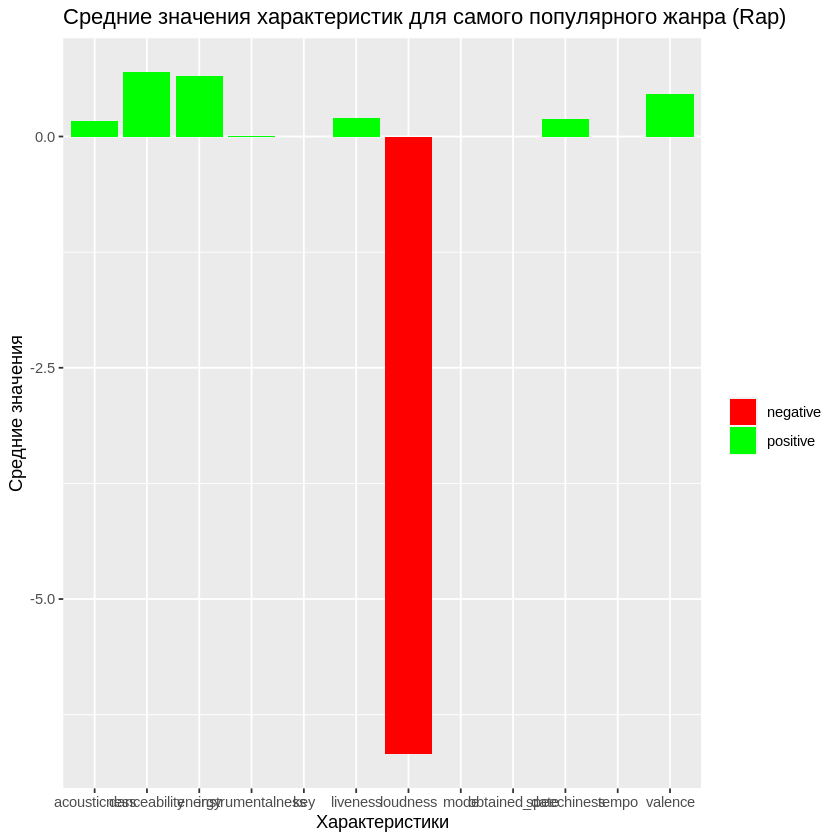

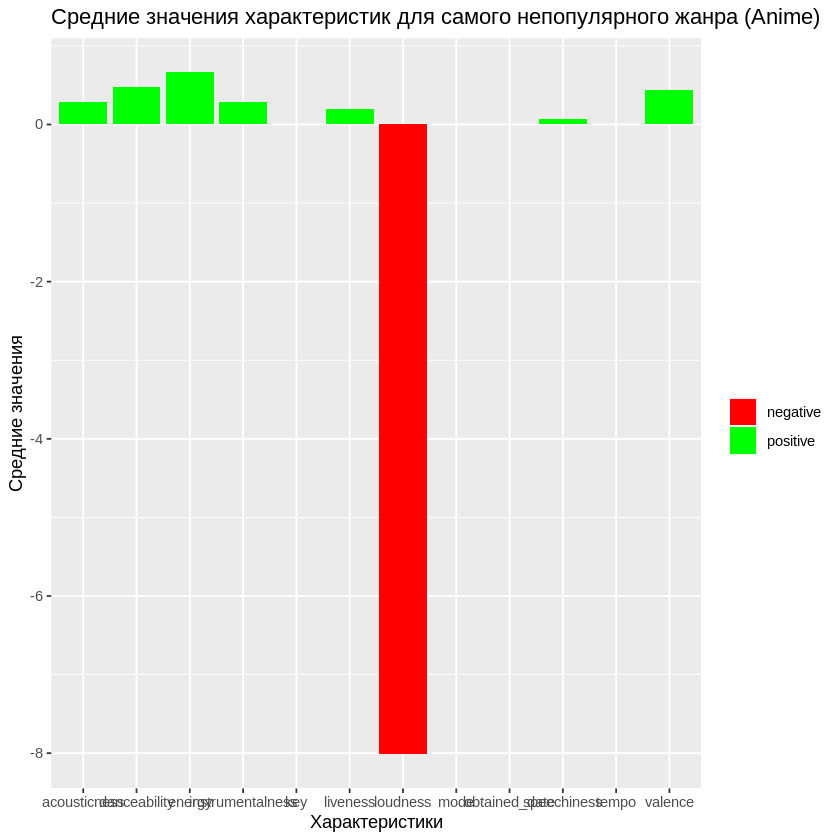

In [20]:
library(dplyr)
library(ggplot2)

df2 <- df %>%
  select(-duration_ms)

# Определение самого популярного жанра
most_popular_genre <- df2 %>%
  group_by(music_genre) %>% 
  summarize(mean_popularity = mean(popularity, na.rm = TRUE)) %>% 
  filter(mean_popularity == max(mean_popularity)) %>% 
  pull(music_genre)

# Определение самого непопулярного жанра
least_popular_genre <- df2 %>%
  group_by(music_genre) %>% 
  summarize(mean_popularity = mean(popularity, na.rm = TRUE)) %>% 
  filter(mean_popularity == min(mean_popularity)) %>% 
  pull(music_genre)

# Создание датафреймов с средними значениями характеристик для самого популярного и самого непопулярного жанров
most_popular_means <- df2 %>%
  filter(music_genre == most_popular_genre) %>% 
  select(acousticness:valence) %>% 
  summarise_all(~mean(., na.rm = TRUE)) %>% 
  pivot_longer(cols = everything(), names_to = "Характеристики", values_to = "Средние значения")

least_popular_means <- df2 %>%
  filter(music_genre == least_popular_genre) %>% 
  select(acousticness:valence) %>% 
  summarise_all(~mean(., na.rm = TRUE)) %>% 
  pivot_longer(cols = everything(), names_to = "Характеристики", values_to = "Средние значения")

# Добавление столбца для окраски столбцов в зависимости от знака
most_popular_means$palette <- ifelse(most_popular_means$`Средние значения` > 0, "positive", "negative")
least_popular_means$palette <- ifelse(least_popular_means$`Средние значения` > 0, "positive", "negative")

# Отрисовка графика для самого популярного жанра
ggplot(most_popular_means, aes(x = Характеристики, y = `Средние значения`, fill = palette)) +
  geom_col(position = position_dodge(preserve = "single")) + 
  scale_fill_manual(name = "", values = c("positive" = "green", "negative" = "red")) +
  ggtitle(paste0("Средние значения характеристик для самого популярного жанра (", most_popular_genre, ")"))

# Отрисовка графика для самого непопулярного жанра
ggplot(least_popular_means, aes(x = Характеристики, y = `Средние значения`, fill = palette)) +
  geom_col(position = position_dodge(preserve = "single")) + 
  scale_fill_manual(name = "", values = c("positive" = "green", "negative" = "red")) +
  ggtitle(paste0("Средние значения характеристик для самого непопулярного жанра (", least_popular_genre, ")"))


### Задание 8

1. Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая" (<=3min), "средняя" (>3min, <=5min), "длинная" (>5min). 
2. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.
3. На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности.

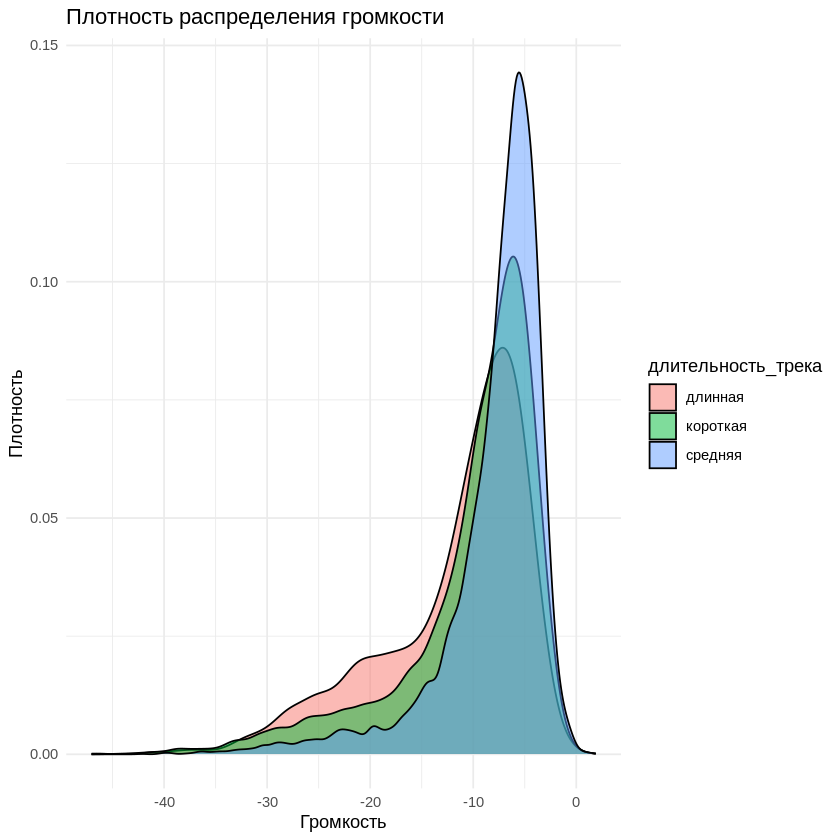

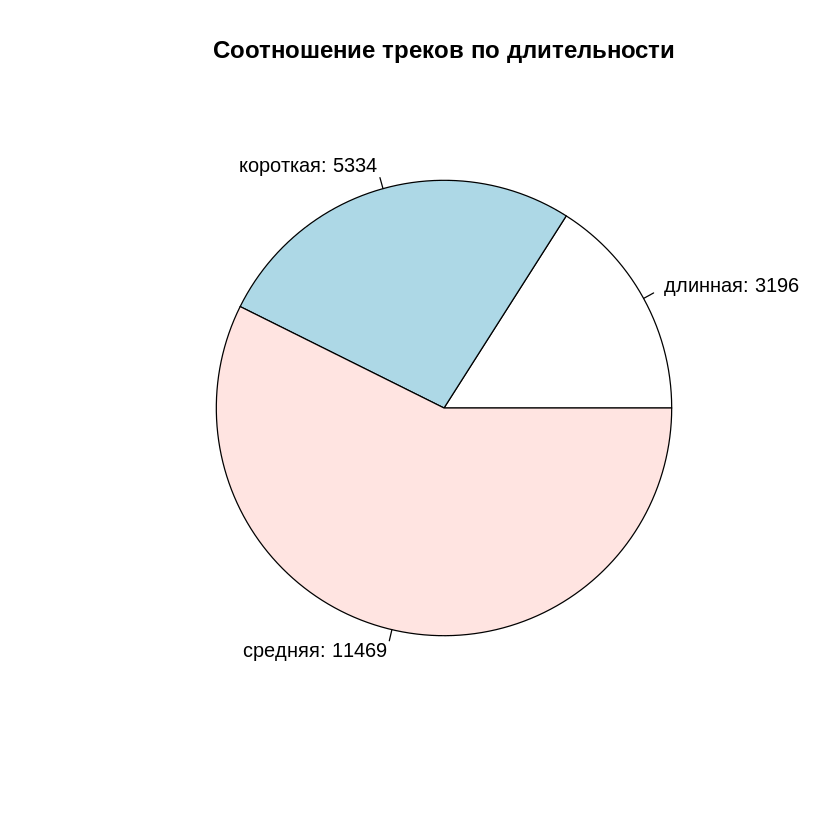

In [22]:
# Добавление категориального столбца "длительность_трека"
df$длительность_трека <- ifelse(df$duration_ms <= 3*60*1000, "короткая",
                          ifelse(df$duration_ms > 3*60*1000 & df$duration_ms <= 5*60*1000, "средняя", "длинная"))

# График плотности распределения loudness
library(ggplot2)

ggplot(df, aes(x = loudness, fill = длительность_трека)) +
  geom_density(alpha = 0.5) +
  ggtitle("Плотность распределения громкости") +
  xlab("Громкость") +
  ylab("Плотность") +
  theme_minimal()

# Круговая диаграмма соотношения треков разной длительности
duration_table <- table(df$длительность_трека)

pie(duration_table, labels = paste0(names(duration_table), ": ", duration_table), main = "Соотношение треков по длительности")
